In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import tree, ensemble, datasets

# 決定木

In [2]:
import seaborn as sns

d = datasets.load_wine()              # wineデータ読込み
dt = tree.DecisionTreeClassifier()    # 決定木
dt.fit(d.data, d.target)              # フィッティング
1-dt.score(d.data,d.target)           # トレーニング誤差

#print(type(d))
print(d.DESCR)
#print(d)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
df = pd.DataFrame(d.data)
df.columns = d.feature_names
df['target'] = d.target
#for i in range(14)
df = df.rename(columns={'alcohol': '1_alcohol', 'malic_acid': '2_malic_acid','ash': '3_ash','alcalinity_of_ash': '4_alcalinity_of_ash','magnesium': '5_magnesium','total_phenols': '6_total_phenols', 'flavanoids': '7_flavanoids','nonflavanoid_phenols': '8_nonflavanoid_phenols','proanthocyanins': '9_proanthocyanins','color_intensity': '10_color_intensity','hue': '11_hue','od280/od315_of_diluted_wines': '12_od280/od315_of_diluted_wines','proline': '13_proline'})
df


,1_alcohol,2_malic_acid,3_ash,4_alcalinity_of_ash,5_magnesium,6_total_phenols,7_flavanoids,8_nonflavanoid_phenols,9_proanthocyanins,10_color_intensity,11_hue,12_od280/od315_of_diluted_wines,13_proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<class 'seaborn.axisgrid.PairGrid'>


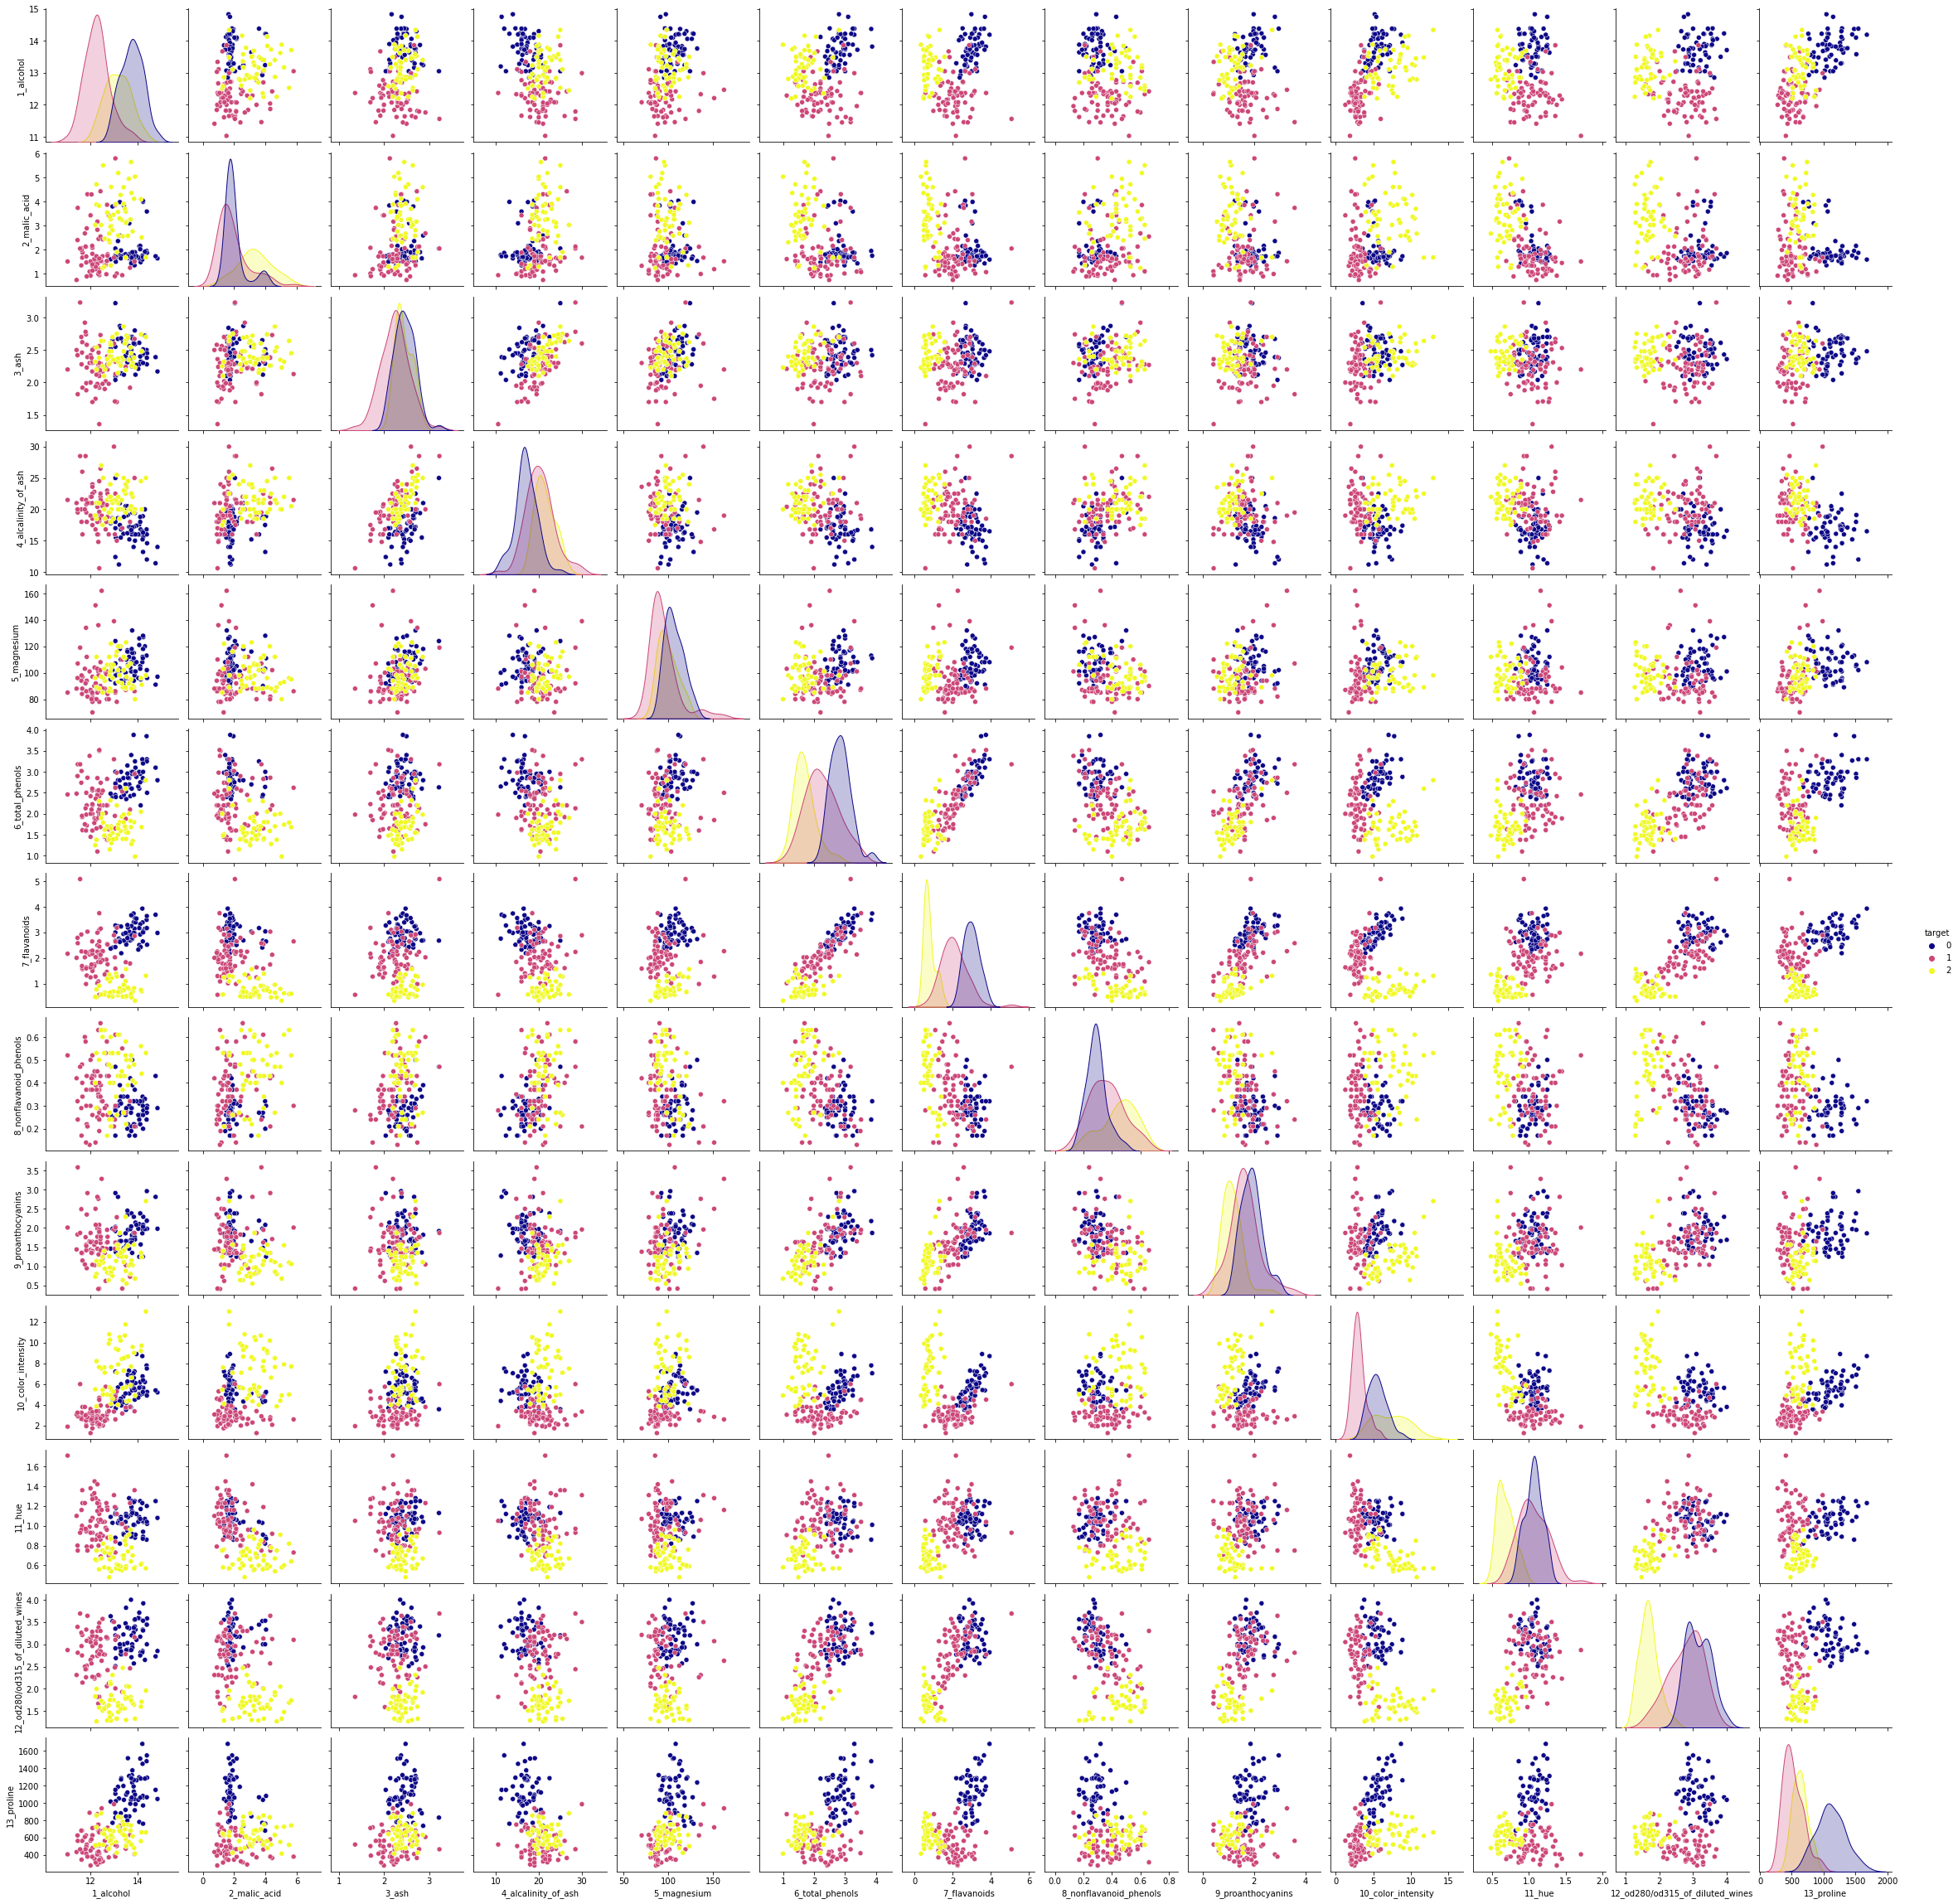

In [4]:


pg = sns.pairplot(df,hue='target', palette= "plasma")#.savefig('/Users/ShuntaroMiwa/python/iiyama'))
print(type(pg))

In [5]:
dt.set_params(max_depth=4)            # 木の深さの最大値を設定（→枝刈り）
dt.fit(d.data, d.target)              # フィッティング
1-dt.score(d.data,d.target)           # トレーニング誤差

0.011235955056179803

In [6]:
import graphviz            # graphviz.Source を使う
# graphvizで決定木を描画
graph = graphviz.Source(tree.export_graphviz(dt,out_file=None))
graph.render("DTplot",view="TRUE")     # 図をファイルに出力

'DTplot.pdf'

# バギング

In [7]:
# 1,2,3,4,5 の復元抽出(リサンプリング)
np.random.choice(5,5)

array([1, 1, 2, 1, 3])

In [8]:
# 0，1,2,3,4 の非復元抽出
np.random.choice(5,5,replace=False)

array([4, 0, 3, 1, 2])

In [9]:
d = datasets.load_iris()                 # データ読込み
i = np.random.choice(d.data.shape[0],100,replace=False)
ti = np.delete(np.arange(d.data.shape[0]),i)
x,    y = d.data[i,:],   d.target[i]        # トレーニングデータ
tx, ty = d.data[ti,:], d.target[ti]      # テストデータ
ba = ensemble.BaggingClassifier(n_estimators=100)
ba.fit(x,y)                         # バギング(B=100)
1-ba.score(tx,ty)                   # テスト誤差

0.020000000000000018

In [10]:
dt = tree.DecisionTreeClassifier()  # 単独の決定木を学習
dt.fit(x,y)
1-dt.score(tx,ty)                   # テスト誤差

0.040000000000000036

# ランダム・フォレスト

In [11]:
d  = pd.read_csv('data/stagec.csv').values   # データ読込み
xa, ya = np.array(d[:,:6]).astype('float'), d[:,7]
i = ~np.isnan(xa).any(axis=1); xa, ya = xa[i,:], ya[i] # nan 除去
x, y    = xa[:100,:], ya[:100]          # トレーニングデータ
tx, ty = xa[100:,:], ya[100:]          # テストデータ
# ランダムフォレスト：木の数 10
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(x,y)
1-rf.score(tx,ty)    # テスト誤差

0.027027027027026973

In [12]:
# ランダムフォレスト：木の数 1000
rf.set_params(n_estimators=1000)
rf.fit(x,y)
1-rf.score(tx,ty)    # テスト誤差

0.027027027027026973

In [13]:
dt = tree.DecisionTreeClassifier()      #  決定木
dt.fit(x,y)
1-dt.score(tx,ty)    # テスト誤差

0.027027027027026973

In [14]:
ba = ensemble.BaggingClassifier(n_estimators=10)  # バギング(B=10)
ba.fit(x,y)
1-ba.score(tx,ty)    # テスト誤差

0.027027027027026973

# ブースティング

In [3]:
n = 4000                               # トレーニングデータ数
d = pd.read_csv('data/soldat.csv').values;  # データ読込み
d=np.delete(d,70,1)                    # nanを除去
i  = np.random.choice(len(d),n,replace=False)  
ti = np.delete(np.arange(len(d)), i)           
x, y  = d[i,:71], d[i,71]             # トレーニングデータ
tx, ty = d[ti,:71], d[ti,71]        # テストデータ
T = 1000                                    # ブースティング：ラウンド数
bl = tree.DecisionTreeClassifier(max_depth=1)               # 決定株
# 決定株でアダブーストを実行
ab = ensemble.AdaBoostClassifier(base_estimator=bl, n_estimators=T)
ab.fit(x,y)                                # フィッティング
# 各ラウンドの誤差
ada_tr_err = np.zeros((T,))            
for i, score in enumerate(ab.staged_score(x,y)): 
    ada_tr_err[i] = 1-score                     # トレーニング誤差
ada_te_err = np.zeros((T,))            
for i, score in enumerate(ab.staged_score(tx,ty)): 
    ada_te_err[i] = 1-score                     # テスト誤差

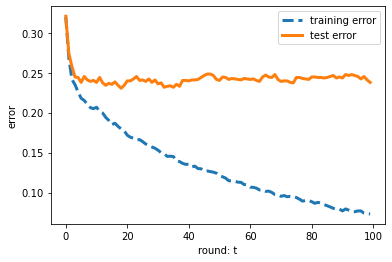

In [4]:
plt.xlabel('round: t')
plt.ylabel('error')
plt.plot(ada_tr_err[::10],label='training error',linestyle='dashed',lw=3)
plt.plot(ada_te_err[::10],label='test error',    linestyle='solid', lw=3)
plt.legend()
plt.show()

In [5]:
import xgboost as xgb          # xgboostを使う
# データ読込み
n = 4000
d = pd.read_csv('data/soldat.csv').values; d = np.delete(d,70,1)
i  = np.random.choice(len(d),n,replace=False)
ti = np.delete(np.arange(len(d)), i)
x, y = d[i,:71], d[i,71]
tx, ty = d[ti,:71], d[ti,71]
T = 1000                       # ラウンド数 1000
xg = xgb.XGBClassifier(n_estimators=T, max_depth=1, objective='binary:logistic')

xg.fit(x,y)                    # フィッティング
1-xg.score(tx,ty)              # テスト誤差

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.23666462293071733

In [6]:
xg = xgb.XGBClassifier(n_estimators=1000, max_depth=1, objective= 'binary:logistic')
cvx = x[:3500,:]; cvy = y[:3500];       # トレーニングデータ
eval_set = [(x[3500:,:], y[3500:])]    # 検証用のデータ
xg.fit(cvx, cvy, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set,verbose=True) # verboseを設定：途中経過をプリント

[0]	validation_0-logloss:0.64777
[1]	validation_0-logloss:0.62098
[2]	validation_0-logloss:0.60168
[3]	validation_0-logloss:0.59067
[4]	validation_0-logloss:0.58033
[5]	validation_0-logloss:0.57571
[6]	validation_0-logloss:0.56874
[7]	validation_0-logloss:0.56516
[8]	validation_0-logloss:0.55987
[9]	validation_0-logloss:0.55903
[10]	validation_0-logloss:0.55729
[11]	validation_0-logloss:0.55353
[12]	validation_0-logloss:0.55293
[13]	validation_0-logloss:0.55061
[14]	validation_0-logloss:0.55068
[15]	validation_0-logloss:0.54717
[16]	validation_0-logloss:0.54581
[17]	validation_0-logloss:0.54373
[18]	validation_0-logloss:0.54244
[19]	validation_0-logloss:0.54204
[20]	validation_0-logloss:0.54164
[21]	validation_0-logloss:0.54148
[22]	validation_0-logloss:0.53908
[23]	validation_0-logloss:0.53783
[24]	validation_0-logloss:0.53588
[25]	validation_0-logloss:0.53580
[26]	validation_0-logloss:0.53413
[27]	validation_0-logloss:0.53384
[28]	validation_0-logloss:0.53249
[29]	validation_0-loglos

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[61]	validation_0-logloss:0.51619
[62]	validation_0-logloss:0.51678
[63]	validation_0-logloss:0.51721
[64]	validation_0-logloss:0.51586
[65]	validation_0-logloss:0.51469
[66]	validation_0-logloss:0.51451
[67]	validation_0-logloss:0.51450
[68]	validation_0-logloss:0.51442
[69]	validation_0-logloss:0.51471
[70]	validation_0-logloss:0.51395
[71]	validation_0-logloss:0.51408
[72]	validation_0-logloss:0.51355
[73]	validation_0-logloss:0.51469
[74]	validation_0-logloss:0.51505
[75]	validation_0-logloss:0.51533
[76]	validation_0-logloss:0.51483
[77]	validation_0-logloss:0.51515
[78]	validation_0-logloss:0.51521
[79]	validation_0-logloss:0.51455
[80]	validation_0-logloss:0.51473
[81]	validation_0-logloss:0.51445


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
xg.best_iteration          # 最適なラウンド数

72

In [8]:
1-xg.score(tx,ty)          # テスト誤差

0.2581238503985285

In [9]:
xg.predict_proba(tx)      # 予測点における各ラベルの条件付き確率

array([[0.8095549 , 0.19044514],
       [0.7943661 , 0.20563386],
       [0.8149037 , 0.18509634],
       ...,
       [0.33802474, 0.66197526],
       [0.8056251 , 0.1943749 ],
       [0.89255357, 0.10744644]], dtype=float32)